# **Métodos Avanzados en Estadística**

## Clasificación supervisada

*Autor: Daniel Beteta Francisco*

In [1]:
install.packages("tidyverse")
install.packages("MASS")

library(dplyr)
library(MASS)

SEED <- 123
set.seed(SEED)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




# **Ejercicio 1**

**El siguiente código carga en R los datos del fichero lirios:**

In [2]:
lirios_data <- read.csv("lirios.csv")
clases_data <- read.csv("clases.csv")

df <- data.frame(
  Sepal.Length=lirios_data$Sepal.Length,	
  Sepal.Width=lirios_data$Sepal.Width,
  Petal.Length=lirios_data$Petal.Length,	
  Petal.Width=lirios_data$Petal.Width,
  Class=clases_data$x
)

head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,3.2,4.7,1.4,0
2,6.4,3.2,4.5,1.5,0
3,6.9,3.1,4.9,1.5,0
4,5.5,2.3,4.0,1.3,0
5,6.5,2.8,4.6,1.5,0
6,5.7,2.8,4.5,1.3,0


**Los datos corresponden a la longitud y anchura del pétalo y del sépalo de 100 lirios, 50 de ellos pertenecen a la especie versicolor y otros 50 a la especie virginica.**

**1. Considera primero únicamente las dos variables correspondientes al sépalo. Calcula los coeficientes de la función discriminante lineal de Fisher y estima la probabilidad de error de esta regla mediante el riesgo empírico $\hat{L}_n$ y la tasa de error por validación cruzada $\hat{L}_n^{vc}$. Compara los valores de estos estimadores con el estimador paramétrico basado en el resultado del ejercicio 4.**

$$
1 - \phi(\hat{\Delta} / 2), \text{donde } \hat{\Delta}^2 
= (\hat{\mu}_0 - \hat{\mu}_1)'\hat{\Sigma}^{-1}(\hat{\mu}_0 - \hat{\mu}_1)
$$

*Coeficientes de la función discriminante de Fisher*

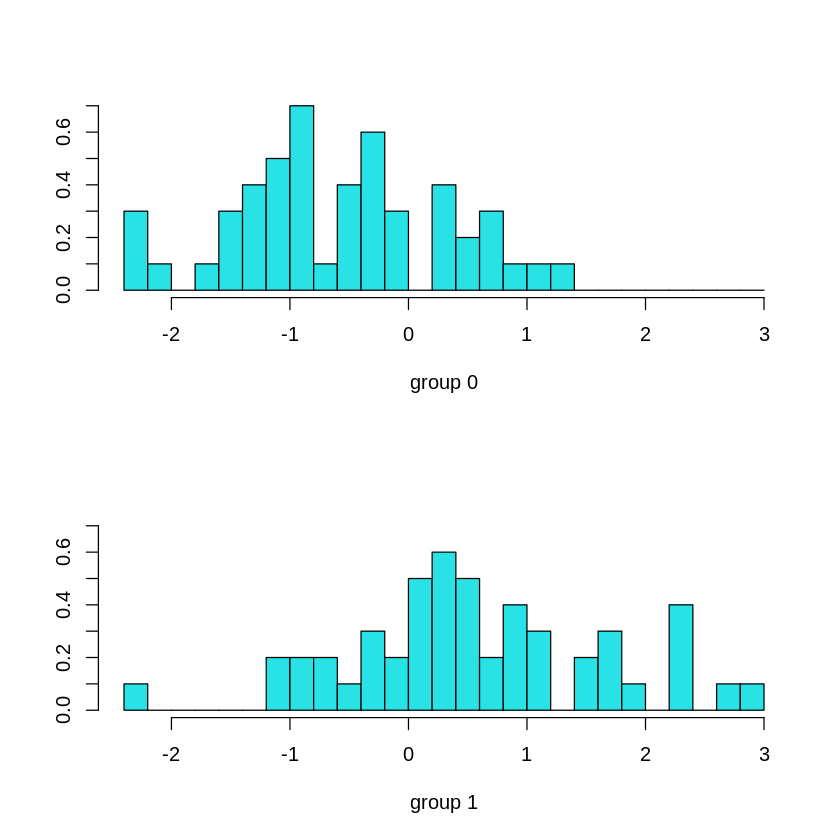

In [3]:
output_sepal.lda <- lda(Class ~ Sepal.Length + Sepal.Width, data=df, prior=c(0.5, 0.5))

plot(output_sepal.lda)

In [4]:
output_sepal.lda

Call:
lda(Class ~ Sepal.Length + Sepal.Width, data = df, prior = c(0.5, 
    0.5))

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  Sepal.Length Sepal.Width
0        5.936       2.770
1        6.588       2.974

Coefficients of linear discriminants:
                   LD1
Sepal.Length 1.6271842
Sepal.Width  0.3435524

*Tasa de error de predicción $\hat{L}_n$*

In [5]:
predictions_sepal.lda <- predict(output_sepal.lda)$class
table(df$Class, predictions_sepal.lda)

   predictions_sepal.lda
     0  1
  0 38 12
  1 13 37

In [6]:
mean(df$Class != predictions_sepal.lda)

[1] 0.25

*Tasa de error por validación cruzada $\hat{L}_n^{vc}$*

In [7]:
predictions_sepal.lda.cv <- lda(Class ~ Sepal.Length + Sepal.Width, data=df, prior=c(0.5, 0.5), CV=TRUE)$class
mean(df$Class != predictions_sepal.lda.cv)

[1] 0.27

*Comparación con el error Bayes*

In [8]:
data_group_zero <- df %>%
                      filter(Class==0)  %>%
                      dplyr::select(Sepal.Length, Sepal.Width)

data_group_one <- df %>%
                     filter(Class==1)  %>%
                     dplyr::select(Sepal.Length, Sepal.Width)
                   
mean_group_zero <- colMeans(data_group_zero)

mean_group_one <- colMeans(data_group_one)

covariance_matrix <- (cov(data_group_zero) + cov(data_group_one)) / 2

mahalanobis_distances <- mahalanobis(mean_group_zero, mean_group_one, covariance_matrix)
bayes_error <- 1 - pnorm(sqrt(mahalanobis_distances)/2, mean=0, sd=1)

bayes_error

[1] 0.2858654

**2. Repite el apartado anterior pero considerando las cuatro variables.**

*Coeficientes de la función discriminante de Fisher*

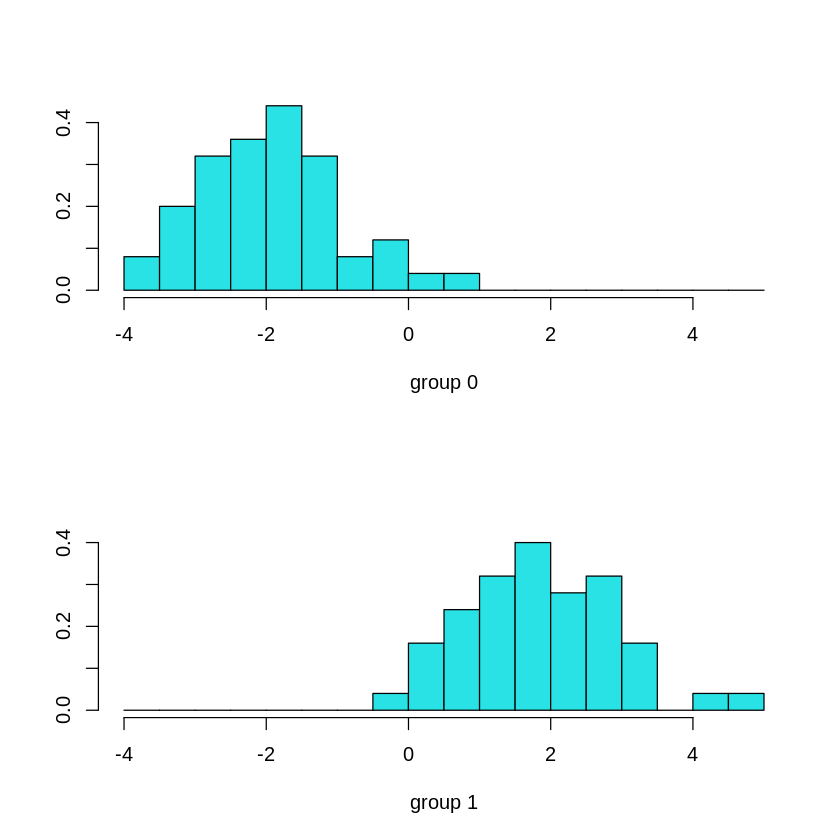

In [9]:
output_full.lda <- lda(Class ~ ., data=df, prior=c(0.5, 0.5))

plot(output_full.lda)

In [10]:
output_full.lda

Call:
lda(Class ~ ., data = df, prior = c(0.5, 0.5))

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
0        5.936       2.770        4.260       1.326
1        6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1
Sepal.Length -0.9431178
Sepal.Width  -1.4794287
Petal.Length  1.8484510
Petal.Width   3.2847304

*Tasa de error de predicción $\hat{L}_n$*

In [11]:
predictions_full.lda <- predict(output_full.lda)$class
table(df$Class, predictions_full.lda)

   predictions_full.lda
     0  1
  0 48  2
  1  1 49

In [12]:
mean(df$Class != predictions_full.lda)

[1] 0.03

*Tasa de error por validación cruzada $\hat{L}_n^{vc}$*

In [13]:
predictions_full.lda.cv <- lda(Class ~ ., data =df, prior=c(0.5, 0.5), CV=TRUE)$class
mean(df$Class != predictions_full.lda.cv)

[1] 0.03

*Comparación con el error Bayes*

In [14]:
data_group_zero <- df %>%
                      filter(Class==0)  %>%
                      dplyr::select(-Class)

data_group_one <- df %>%
                     filter(Class==1)  %>%
                     dplyr::select(-Class)

mean_group_zero <- colMeans(data_group_zero)

mean_group_one <- colMeans(data_group_one)

covariance_matrix <- (cov(data_group_zero) + cov(data_group_one)) / 2

mahalanobis_distances <- mahalanobis(mean_group_zero, mean_group_one, covariance_matrix)
bayes_error <- 1 - pnorm(sqrt(mahalanobis_distances)/2, mean=0, sd=1)

bayes_error

[1] 0.02968814

Como podemos observar el error Bayes es de $\approx 2.97$%, luego vemos que tanto la tasa de error de predicción como por la tasa de error por validación cruzada se acercan mucho a este valor óptimo, $\hat{L}_n = \hat{L}_n^{vc} = 3$%, luego se concluye que la función discriminante lineal de Fisher ajusta de manera adecuada el comportamiento de los datos.